<a href="https://colab.research.google.com/github/Rajveer-03/Cancer_Data_Analysis_And_Data_Visualization/blob/main/Cancer_Data_Analysis_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<p>
  <b><h1>Cancer Analysis</h1></b>
</p>

>Cancer is a complex and devastating disease that affects millions of people worldwide. Despite significant progress in the development of cancer treatments, the incidence of cancer continues to rise. To better understand the underlying causes of cancer and improve treatment outcomes, there is a growing need for advanced data analysis techniques that can help identify patterns and trends in large datasets.<br><br>This cancer data analysis project aims to explore and analyze large-scale cancer datasets to uncover potential correlations between different factors such as age, gender, lifestyle, and genetics that contribute to the development and progression of cancer. By leveraging advanced statistical and machine learning algorithms, we hope to identify key biomarkers, risk factors, and potential treatment targets that can help improve cancer prevention and management.

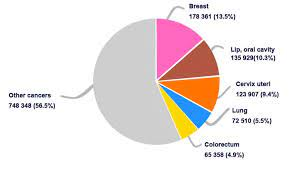

In [ ]:
# IMPORTING ALL THE MODULES WE NEED TO USE FOR THE ANALYSIS
import pandas as pd                                    # CALLING PANDAS FOR DATA MANUPLATION AND ANALYSIS
import numpy as np                                     # CALLING NUMPY FOR ADDING SUPPORT FOR LARGE,MULTI-DIMENSIONAL ARRAYS AND MATRICES!!!!
from matplotlib import pyplot as plt                   # CALLING MATPLOTLIB FOR VISUALIZING THE DATA
import plotly.express as px                            # CALLING PLOTLY.EXPRESS FOR INTERACTIVE DATA VISUALIZATION
import plotly.graph_objects as go                      # CALLING PLOTLY.GRAPGH_OBJECTS FOR INTERACTIVE DATA VISUALIZATION
import folium                                          # CALLING FOLIUM FOR CREATING THE INTERACTIve maps
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import plotly
plotly.io.renderers.default = 'colab'



In [ ]:
# READING THE CSV USING PANDAS PACKAGE
df = pd.read_csv("number-of-people-with-cancer-by-age.csv")

In [ ]:
#CALLING THE FIRST FIVE ROWS OF THE CSV FILE
df.head()

,Entity,Code,Year,Prevalence - Neoplasms - Sex: Both - Age: 70+ years (Number),Prevalence - Neoplasms - Sex: Both - Age: 50-69 years (Number),Prevalence - Neoplasms - Sex: Both - Age: 15-49 years (Number),Prevalence - Neoplasms - Sex: Both - Age: 5-14 years (Number),Prevalence - Neoplasms - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,AFG,1990,5468.171987,15160.550584,11118.797151,2162.519557,3458.692194
1,Afghanistan,AFG,1991,5542.409743,15403.327902,11275.643030,2182.992003,3380.741640
2,Afghanistan,AFG,1992,5633.485650,15929.131333,12915.115833,2338.885361,3515.259263
3,Afghanistan,AFG,1993,5750.508685,16450.708878,14440.560525,2651.815246,4116.452952
4,Afghanistan,AFG,1994,5847.519083,16843.596095,14927.822050,2760.429474,4835.583726


In [ ]:
#CALLING ALL THE COLUMS OF THE FILE
df.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Neoplasms - Sex: Both - Age: 70+ years (Number)',
       'Prevalence - Neoplasms - Sex: Both - Age: 50-69 years (Number)',
       'Prevalence - Neoplasms - Sex: Both - Age: 15-49 years (Number)',
       'Prevalence - Neoplasms - Sex: Both - Age: 5-14 years (Number)',
       'Prevalence - Neoplasms - Sex: Both - Age: Under 5 (Number)'],
      dtype='object')

In [ ]:
# CHANGING THE NAMES OF THE COLUMNS TO MORE SPECIFIC VALUES FOR EASE OF ANALYSIS
df.columns = ['Entity', 'Code', 'Year', '70', '50-69', '15-49', '5-14', '0-5']

In [ ]:
# FILTERINF OUT THE REQUIRED DATA...!
df = df[(df['Entity'] == 'India') & (df['Year']>=2000)]
df

,Entity,Code,Year,70,50-69,15-49,5-14,0-5
2698,India,IND,2000,251072.252099,7.246433e+05,6.477916e+05,12991.069551,67476.714345
2699,India,IND,2001,265306.180444,7.421272e+05,6.514134e+05,13618.050767,65082.365532
2700,India,IND,2002,279087.290878,7.596744e+05,6.483297e+05,9381.440174,63870.141670
2701,India,IND,2003,293668.530456,7.756143e+05,6.452205e+05,7611.442243,62750.396461
2702,India,IND,2004,305846.975865,7.807175e+05,6.498100e+05,8137.680716,61215.984906
2703,India,IND,2005,325680.915693,8.043815e+05,6.775599e+05,9018.411733,59209.912984
2704,India,IND,2006,345075.256760,8.381112e+05,7.007462e+05,9043.551723,57556.397539
2705,India,IND,2007,364984.900626,8.835799e+05,7.326748e+05,8331.578264,54777.136305
2706,India,IND,2008,389264.918333,9.299655e+05,7.730891e+05,7225.917437,53807.781579
2707,India,IND,2009,416102.350697,9.781884e+05,8.165601e+05,7797.407465,52741.284013


In [ ]:
df1 = df.iloc[:, 0:3]

In [ ]:
df1.head()

,Entity,Code,Year
2698,India,IND,2000
2699,India,IND,2001
2700,India,IND,2002
2701,India,IND,2003
2702,India,IND,2004


In [ ]:
df2 = df.iloc[:, 3:]

In [ ]:
df2.head()

,70,50-69,15-49,5-14,0-5
2698,251072.252099,724643.256003,647791.612258,12991.069551,67476.714345
2699,265306.180444,742127.168938,651413.368624,13618.050767,65082.365532
2700,279087.290878,759674.394003,648329.704252,9381.440174,63870.141670
2701,293668.530456,775614.259287,645220.532890,7611.442243,62750.396461
2702,305846.975865,780717.470880,649810.015039,8137.680716,61215.984906


In [ ]:
arr1 = df2.values.reshape(1, -1)
arr1

array([[ 251072.252099  ,  724643.256003  ,  647791.612258  ,
          12991.0695507 ,   67476.714345  ,  265306.180444  ,
         742127.168938  ,  651413.368624  ,   13618.0507671 ,
          65082.3655316 ,  279087.290878  ,  759674.394003  ,
         648329.704252  ,    9381.44017438,   63870.1416695 ,
         293668.530456  ,  775614.259287  ,  645220.53289   ,
           7611.44224323,   62750.396461  ,  305846.975865  ,
         780717.47088   ,  649810.015039  ,    8137.68071642,
          61215.984906  ,  325680.915693  ,  804381.547955  ,
         677559.94974   ,    9018.41173305,   59209.9129837 ,
         345075.25676   ,  838111.19196   ,  700746.247822  ,
           9043.5517228 ,   57556.3975393 ,  364984.900626  ,
         883579.947053  ,  732674.821777  ,    8331.5782644 ,
          54777.1363052 ,  389264.918333  ,  929965.49255   ,
         773089.093339  ,    7225.91743721,   53807.7815787 ,
         416102.350697  ,  978188.356635  ,  816560.069382  ,
        

In [ ]:
arr2 = np.array(df2.columns)
arr2 = np.tile(arr2, df2.shape[0]) #it will repeat the values to convert df into suitable format

In [ ]:
arr1 = arr1.T.ravel()

In [ ]:
arr1

array([ 251072.252099  ,  724643.256003  ,  647791.612258  ,
         12991.0695507 ,   67476.714345  ,  265306.180444  ,
        742127.168938  ,  651413.368624  ,   13618.0507671 ,
         65082.3655316 ,  279087.290878  ,  759674.394003  ,
        648329.704252  ,    9381.44017438,   63870.1416695 ,
        293668.530456  ,  775614.259287  ,  645220.53289   ,
          7611.44224323,   62750.396461  ,  305846.975865  ,
        780717.47088   ,  649810.015039  ,    8137.68071642,
         61215.984906  ,  325680.915693  ,  804381.547955  ,
        677559.94974   ,    9018.41173305,   59209.9129837 ,
        345075.25676   ,  838111.19196   ,  700746.247822  ,
          9043.5517228 ,   57556.3975393 ,  364984.900626  ,
        883579.947053  ,  732674.821777  ,    8331.5782644 ,
         54777.1363052 ,  389264.918333  ,  929965.49255   ,
        773089.093339  ,    7225.91743721,   53807.7815787 ,
        416102.350697  ,  978188.356635  ,  816560.069382  ,
          7797.40746539,

In [ ]:
arr2

array(['70', '50-69', '15-49', '5-14', '0-5', '70', '50-69', '15-49',
       '5-14', '0-5', '70', '50-69', '15-49', '5-14', '0-5', '70',
       '50-69', '15-49', '5-14', '0-5', '70', '50-69', '15-49', '5-14',
       '0-5', '70', '50-69', '15-49', '5-14', '0-5', '70', '50-69',
       '15-49', '5-14', '0-5', '70', '50-69', '15-49', '5-14', '0-5',
       '70', '50-69', '15-49', '5-14', '0-5', '70', '50-69', '15-49',
       '5-14', '0-5', '70', '50-69', '15-49', '5-14', '0-5', '70',
       '50-69', '15-49', '5-14', '0-5', '70', '50-69', '15-49', '5-14',
       '0-5', '70', '50-69', '15-49', '5-14', '0-5', '70', '50-69',
       '15-49', '5-14', '0-5', '70', '50-69', '15-49', '5-14', '0-5',
       '70', '50-69', '15-49', '5-14', '0-5', '70', '50-69', '15-49',
       '5-14', '0-5'], dtype=object)

In [ ]:
df1 = df1.apply(lambda row: row.repeat(5), axis=0) #repeats the values in 00 11 np.repeat format

In [ ]:
df1['Age'] = arr2

In [ ]:
df1['number'] = arr1

In [ ]:
df1.head()

,Entity,Code,Year,Age,number
2698,India,IND,2000,70,251072.252099
2698,India,IND,2000,50-69,724643.256003
2698,India,IND,2000,15-49,647791.612258
2698,India,IND,2000,5-14,12991.069551
2698,India,IND,2000,0-5,67476.714345


In [ ]:
#PLOTTING THE BAR GRAPH OF THE GIVEN DATA WITH RESPECT TO THEIR AGE GROUP....
fig = px.bar(df1, x="Year", y="number", color="Age", title="number of people with cancer by age groups")
fig.show()

In [ ]:
#PLOTTING THE HEAT MAP FOR THE AGE GROUP OF 5-14 BECAUSE THE DATA IS VERY MINUTE AS COMPARE TO OTHER GROUPS!!
fig = px.bar(df, x="Year", y="5-14", color ='5-14', title="number of people with cancer by age(5-14)")
fig.show()

In [ ]:
#PLOTTING THE SCATTER GRAPH FOR THE PEOPLE AFFECTED BY THE CANCER WITH RESPECT OT THEIR AGE GROUPS...
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Year'], y=df['70'], name = '70'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['50-69'], name = '50-69'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['15-49'], name = '15-49'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['5-14'], name = '5-14'))
fig.add_trace(go.Scatter(x=df['Year'], y=df['0-5'], name = '0-5'))

fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

fig.show()

<hr>

Cancer is a complex and heterogeneous disease that can occur in various parts of the body. The incidence and prevalence of different types of cancer vary widely, with some being more common than others. Here is a list of some of the most common types of cancer, based on their prevalence:
<br>
<ol>
  <li>Breast cancer</li>
  <li>Lung cancer</li>
  <li>Colorectal cancer</li>
  <li>Cervical cancer</li>
  <li>Prostate cancer</li>
  <li>Stomach cancer</li>
  <li>Liver  cancer</li>
</ol>
<p>
We will now commence a brief analysis of each of the cancers listed above,    examining both common and distinct features that are specific to each type.
</p>

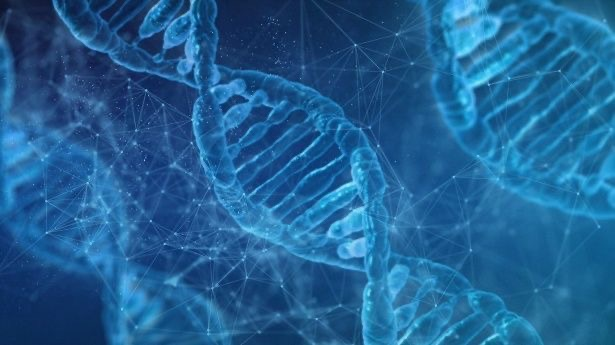

# **Breast Cancer**
> Breast cancer is a type of cancer that originates in the breast tissue. It occurs when cells in the breast tissue grow uncontrollably and form a tumor. There are several types of breast cancer, including ductal carcinoma, lobular carcinoma, and inflammatory breast cancer, each with different characteristics and treatment options.
<br><br>
> The goal of this analysis is to analyse the trend which was followed in the growth of the cancer from 2013 till 2019 (in India) and forecast the change in trends in the future.

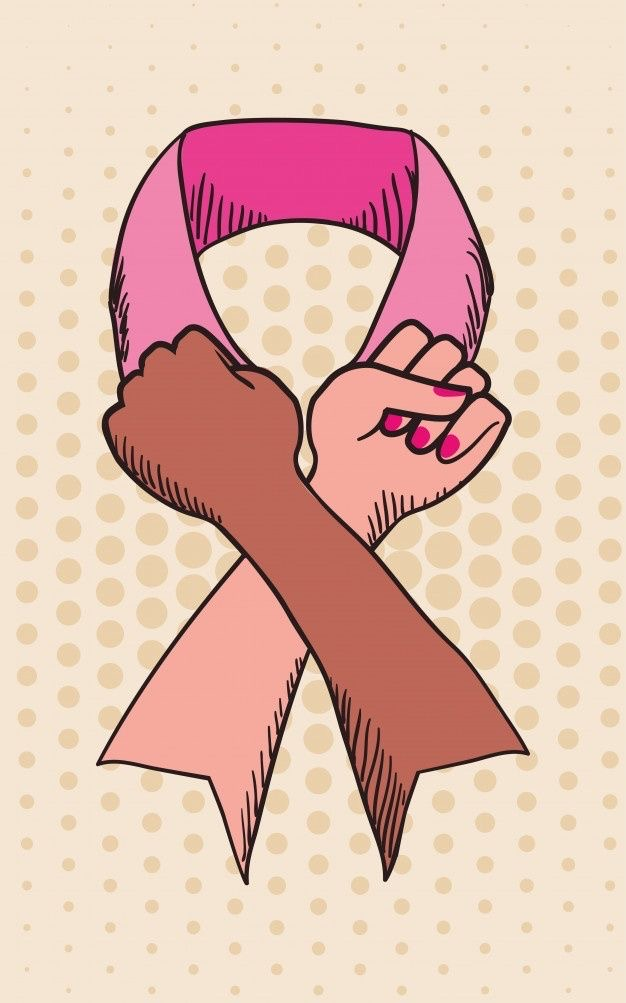

In [ ]:
# READING THE DATASET WITH THE HELP OF PANDAS
breast_cancer_new_cases = pd.read_csv('/content/breast_cancer_new_cases_per_100000_women (1).csv')
breast_cancer_deaths = pd.read_csv('/content/breast_cancer_deaths_per_100000_women (1).csv')

In [ ]:
#CALLING THE FIRST FIVE ENTRIES OF DATASET
breast_cancer_new_cases.head()

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.3,19.6,19.9,20.1,20.4,20.7,21.1,21.6,22.0,22.3
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.9,22.4,22.8,22.9,22.9,23.5,24.2,25.0,25.9,26.4
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.2,36.2,36.4,36.6,37.0,37.7,38.2,38.5,38.8,39.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.5,76.6,77.6,78.8,80.1,81.2,81.2,81.1,80.9,80.6
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.4,73.3,73.8,70.8,55.6,55.8,56.1,56.2,56.9,57.5


In [ ]:
#CALLING THE FIRST FIVE ENTRIES OF DATASET
breast_cancer_deaths.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.1,15.2,15.3,15.4,15.6,15.7,15.9,16.2,16.4,16.5
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.6,17.8,18.0,18.1,18.0,18.4,18.8,19.2,19.7,20.0
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.3,12.2,12.1,12.1,12.0,12.0,12.0,12.0,12.0,11.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.3,16.5,16.7,17.0,17.2,17.4,17.4,17.4,17.3,17.3
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.3,41.2,41.0,38.3,27.1,26.9,26.8,26.5,26.4,26.2


In [ ]:
# MAKING A LIST OF FEATURES TO BE EXTRACTED FROM THE DATSET
features = ['country']+['201'+ str(i) for i in range(0,10)]

In [ ]:
# EXTRACTING THE REQUIRED FEATYRE AND STORING THEM IN A VARIABLES
breast_cancer_new_cases = breast_cancer_new_cases[breast_cancer_new_cases['country'] == 'India'].loc[:,features]
breast_cancer_deaths = breast_cancer_deaths[breast_cancer_deaths['country'] == 'India'].loc[:,features]

In [ ]:
# PLOTTING AN INTERACTIVE GRAPH USING PLOTLY FOR EASIER AND EFFICIENT ANALYSIS

# assigning values to the X and Y axis of the graph
X1 = breast_cancer_new_cases.columns[1:]
y1 = breast_cancer_new_cases.values[0][1:]
X2 = breast_cancer_deaths.columns[1:]
y2 = breast_cancer_deaths.values[0][1:]

# PLOTTING THE GRAPH
fig = go.Figure()
fig.add_trace(go.Scatter(x=X1, y = y1, mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x=X2, y = y2, mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Breast Cancer(in Women)",    #ADDING TITLE TO THE GRAPH
    xaxis_title="Year",                 #ADDING HEADING TO X-AXIS
    yaxis_title="per 100,000",          #ADDING HEADING TO Y-AXIS
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

In [ ]:
# Extracting features for prediction of new cases and deaths per 100,000 for breast cancer in women
breast_cancer_new_cases = pd.read_csv('/content/breast_cancer_new_cases_per_100000_women (1).csv')
breast_cancer_deaths = pd.read_csv('/content/breast_cancer_deaths_per_100000_women (1).csv')
features=['country']+['199'+ str(i) for i in range(0,10)]
features = features+['200'+ str(i) for i in range(0,10)]
features = features+['201'+ str(i) for i in range(0,10)]
breast_cancer_deaths = breast_cancer_deaths[breast_cancer_deaths['country']=='India'].loc[:,features]
breast_cancer_new_cases = breast_cancer_new_cases[breast_cancer_new_cases['country'] == 'India'].loc[:,features]

X1 = breast_cancer_new_cases.columns[1:].values.reshape(-1, 1)
y1 = breast_cancer_new_cases.values[0][1:].reshape(-1, 1)
X2 = breast_cancer_deaths.columns[1:].values.reshape(-1, 1)
y2 = breast_cancer_deaths.values[0][1:].reshape(-1, 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 5)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)
model1 = LinearRegression()       # creating linear Regression model object
model1.fit(X1_train_trans, y1_train)    # training the model
model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)
y1_pred = model1.predict(X1_test_trans)
y2_pred = model2.predict(X2_test_trans)
print(r2_score(y1_pred, y1_test))
print(r2_score(y2_pred, y2_test))
y1_pred = model1.predict(poly.transform(X1))
y2_pred = model2.predict(poly.transform(X2))
keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict1 = sorted(keydict1.items())
dict2 = sorted(keydict2.items())
final1 = {}
final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
final2 = Convert(dict2, final2)
X1_final = []
Y1_final = []
X2_final = []
Y2_final = []
for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)
for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)
X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)
X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='Predicted New Cases'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='Pridicted Deaths'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

0.9478807337037609
0.8421265525501941


#Number of cases of Breast Cancer from  2016-2021 in India

In [ ]:
#CALLING THE CSV FILE FOR BREAST CANCER IN INDIA USING PANDAS LIBRARY..
breast_cancer_cases=pd.read_csv('/content/Breast_cancer_india(2016-2021)with latlong.csv')


In [ ]:
#CALLING THE FIRST FIVE ENTRIES OF THE DATASET
breast_cancer_cases.head()


,States/UT,2016,2017,2018,2019,2020,2021,Latitude,Longitude
0,Jammu & Kashmir,1421,1516,1618,12675,13012,13354,34.299959,74.466658
1,Himachal Pradesh,613,647,681,8589,8799,8978,31.100025,77.166597
2,Punjab,3321,3503,3694,37744,38636,39521,31.519974,75.980003
3,Chandigarh,196,207,219,994,1024,1053,30.719997,76.780006
4,Uttaranchal,1217,1298,1384,11216,11482,11779,30.320409,78.050006


In [ ]:
#PLOTTING THE MAP OF THE DATA SET WITH THE HELP OF FOLIUM LIBRARY
mapObj= folium.Map( location = [24.2170111233401, 81.0791015625000],  zoom_start = 4) #CALLING THE MAP OBJECT
# ADDING THE DIFFERENT STYLE OF MAPS!!
folium.TileLayer('openstreetmap').add_to(mapObj)                                #ADDING THE STREETMAP STYLE IN THE MAP
folium.TileLayer('stamenterrain', attr="stamenterrain").add_to(mapObj)          #ADDING THE STAMEN TERRRAIN STYLE IN THE MAP
folium.TileLayer('stamenwatercolor', attr="stamenwatercolor").add_to(mapObj)    #ADDING THE STAMEN WATERCOLOR STYLE IN THE MAP
#ADDING THE HEADING IN THE MAP
mapObj.get_root().html.add_child(folium.Element('''
<div Style = Position:fixed;left:70px;top:0px;z-index:1000>
	<h2> State Wise Data For Cancer		</h2> <br/>
</div> '''))

ShapesLayer = folium.FeatureGroup(name='Shapes').add_to(mapObj)


for i in range(0,len(breast_cancer_cases)-1):


 folium.Marker(radius=1, weight=1, border_width=10,
      location=[breast_cancer_cases.iloc[i]['Latitude'], breast_cancer_cases.iloc[i]['Longitude']],
      tooltip=breast_cancer_cases.iloc[i]['States/UT'] ,
      popup=folium.Popup('Number of cases in year  \n'+ '<b>2016</b> :' +  str(breast_cancer_cases.iloc[i]['2016']) + ' \n'+'<b>2017</b>: '+ str(breast_cancer_cases.iloc[i]['2017']) + '\n '+'<b>2018</b>: '+ str(breast_cancer_cases.iloc[i]['2018']) + '\n '+'<b>2019:</b> '+ str(breast_cancer_cases.iloc[i]['2019']) + '\n '+'<b>2020:</b> ' + str(breast_cancer_cases.iloc[i]['2020']) + '\n'+'<b>2021:</b>' + str(breast_cancer_cases.iloc[i]['2021'])
 ,max_width=400 ),
       icon = folium.Icon(icon='plus-square',prefix='fa')
        ).add_to(ShapesLayer)
folium.LayerControl().add_to(mapObj)

mapObj.save('my_map3.html')
mapObj


#Survival rate for breast cancer around the world!!

In [ ]:
#CALLING THE DATASET FOR THE SURVIVAL OF BREAST CANCER
bre_sur=pd.read_csv("/content/five-year-survival-rates-from-breast-cancer.csv")
bre_sur

,Entity,Code,Year,Breast,latitude,longitude
0,Algeria,DZA,1999,17.1,NaN,NaN
1,Algeria,DZA,2004,29.5,NaN,NaN
2,Algeria,DZA,2009,59.8,NaN,NaN
3,Argentina,ARG,2004,75.5,NaN,NaN
4,Argentina,ARG,2009,76.6,NaN,NaN
...,...,...,...,...,...,...
151,United Kingdom,GBR,2004,78.7,51.528642,-0.101599
152,United Kingdom,GBR,2009,81.1,51.528642,-0.101599
153,United States,USA,1999,86.0,39.764339,-104.855111
154,United States,USA,2004,87.9,39.764339,-104.855111


In [ ]:
#FILTERING THE DATA WITH THE HELP OF PANDAS
bre_sur=bre_sur[(bre_sur["Entity"]=="Canada")|(bre_sur["Entity"]=="India")|(bre_sur["Entity"]=="United States")|(bre_sur["Entity"]=="Australia")|(bre_sur["Entity"]=="China")|(bre_sur["Entity"]=="United Kingdom")|(bre_sur["Entity"]=="Brazil")|(bre_sur["Entity"]=="France")|(bre_sur["Entity"]=="New Zealand")|(bre_sur["Entity"]=="Turkey")]
bre_sur

,Entity,Code,Year,Breast,latitude,longitude
5,Australia,AUS,1999,84.6,-26.177229,133.417012
6,Australia,AUS,2004,86.4,-26.177229,133.417012
7,Australia,AUS,2009,86.2,-26.177229,133.417012
13,Brazil,BRA,1999,78.2,-22.163354,-67.928008
14,Brazil,BRA,2004,86.9,-22.163354,-67.928008
15,Brazil,BRA,2009,87.4,-22.163354,-67.928008
19,Canada,CAN,1999,83.7,56.970514,-84.908392
20,Canada,CAN,2004,85.3,56.970514,-84.908392
21,Canada,CAN,2009,85.8,56.970514,-84.908392
25,China,CHN,1999,53.8,39.938884,116.397459


In [ ]:
#PLOTTING THE MAP GRAPH FOR SURVIVALS OF BREAST CANCER USING FOLIUM LIBRARIES
breast_map= folium.Map(location=[54.089525,-15.012030],zoom_start=2)
folium.TileLayer('openstreetmap').add_to(breast_map)                            #ADDING THE STREETMAP STYLE IN THE MAP
folium.TileLayer('stamenterrain', attr="stamenterrain").add_to(breast_map)      #ADDING THE STAMEN TERRAIN STYLE IN THE MAP
folium.TileLayer('stamenwatercolor', attr="stamenwatercolor").add_to(breast_map)#ADDING THE STAMEN WATERCOLOR STYLE IN THE MAP
#ADDINF THE TITLE TO THE MAP
breast_map.get_root().html.add_child(folium.Element('''
<div Style = Position:fixed;left:70px;top:0px;z-index:1000>
	<h2> Country Wise Data For Cancer		</h2> <br/>
</div> '''))

#USE TO INSERT BUTTON...
ShapesLayer = folium.FeatureGroup(name='Shapes').add_to(breast_map)

for i in range(0,len(bre_sur),2):
  folium.Marker(radius=1, weight=1, border_width=10,
      location=[bre_sur.iloc[i]['latitude'], bre_sur.iloc[i]['longitude']],
      tooltip=bre_sur.iloc[i]['Entity'] ,
      popup=folium.Popup(' Year  \n'+ '<b>2009</b> :' + '\n'+ str(bre_sur.iloc[i]['Breast']) + ' \n'+'<b>2004</b>: '+ str(bre_sur.iloc[i-1]['Breast']) + '\n '+'<b>1999</b>: '+ str(bre_sur.iloc[i-2]['Breast'])
      ,max_width=400 ),
       icon = folium.Icon(icon='plus-square',prefix='fa')
        ).add_to(ShapesLayer)
folium.LayerControl().add_to(breast_map)

breast_map

##DEATHS DUE TO TOBACCO

In [ ]:
#CALLING THE DATASET OF CANCER DEATHS DUE TO CONSUMPTION OF TOBACCO...
tobacco_deaths = pd.read_csv('/content/share-of-cancer-deaths-attributed-to-tobacco.csv')


In [ ]:
#CALLING THE FIRST FIVE ENTRIES OF DATASET
tobacco_deaths.head()

,Entity,Code,Year,Deaths - Cause: Neoplasms - Risk: Smoking - OWID - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,8.22
1,Afghanistan,AFG,1991,8.21
2,Afghanistan,AFG,1992,8.22
3,Afghanistan,AFG,1993,8.22
4,Afghanistan,AFG,1994,8.22


In [ ]:
tobacco_deaths.tail()

,Entity,Code,Year,Deaths - Cause: Neoplasms - Risk: Smoking - OWID - Sex: Both - Age: Age-standardized (Percent)
6835,Zimbabwe,ZWE,2015,15.55
6836,Zimbabwe,ZWE,2016,15.49
6837,Zimbabwe,ZWE,2017,15.43
6838,Zimbabwe,ZWE,2018,15.40
6839,Zimbabwe,ZWE,2019,15.35


In [ ]:
tobacco_deaths.iloc[:,3]
#RENAMING THE TITLES!!
tobacco_deaths=tobacco_deaths.rename(columns={'Deaths - Cause: Neoplasms - Risk: Smoking - OWID - Sex: Both - Age: Age-standardized (Percent)':'Percentage'})

In [ ]:
tobacco_deaths.head()

,Entity,Code,Year,Percentage
0,Afghanistan,AFG,1990,8.22
1,Afghanistan,AFG,1991,8.21
2,Afghanistan,AFG,1992,8.22
3,Afghanistan,AFG,1993,8.22
4,Afghanistan,AFG,1994,8.22


In [ ]:
tobacco_deaths=tobacco_deaths[tobacco_deaths['Year']>2010]
tobacco_deaths

,Entity,Code,Year,Percentage
21,Afghanistan,AFG,2011,9.72
22,Afghanistan,AFG,2012,9.85
23,Afghanistan,AFG,2013,9.94
24,Afghanistan,AFG,2014,10.04
25,Afghanistan,AFG,2015,10.16
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,15.55
6836,Zimbabwe,ZWE,2016,15.49
6837,Zimbabwe,ZWE,2017,15.43
6838,Zimbabwe,ZWE,2018,15.40


In [ ]:
tobacco_deaths=tobacco_deaths[(tobacco_deaths["Entity"]=="Canada")|(tobacco_deaths["Entity"]=="India")
|(tobacco_deaths["Entity"]=="United States")|(tobacco_deaths["Entity"]=="Australia")|(tobacco_deaths["Entity"]=="China")|(tobacco_deaths["Entity"]=="United Kingdom")
|(tobacco_deaths["Entity"]=="Brazil")|(tobacco_deaths["Entity"]=="France")|(tobacco_deaths["Entity"]=="New Zealand")
|(tobacco_deaths["Entity"]=="Russia")|(tobacco_deaths["Entity"]=="Turkey")]
tobacco_deaths

,Entity,Code,Year,Percentage
321,Australia,AUS,2011,20.68
322,Australia,AUS,2012,20.41
323,Australia,AUS,2013,20.18
324,Australia,AUS,2014,19.95
325,Australia,AUS,2015,19.55
...,...,...,...,...
6355,United States,USA,2015,31.11
6356,United States,USA,2016,30.77
6357,United States,USA,2017,30.57
6358,United States,USA,2018,30.59


In [ ]:
tobacco_deaths=tobacco_deaths.fillna(0)

In [ ]:
#PLOTTING THE GRAPH WITH SUNBURST MAP OF PERCENTAGE OF DEATHS DUE TO TOBACCO IN EACH COUNTRY.
fig=px.sunburst(data_frame=tobacco_deaths,path=['Entity','Code', 'Year','Percentage' ]
                ,hover_data=['Code'],maxdepth=2,width=600,height=600,
                color_discrete_sequence=px.colors.qualitative.Prism)

fig.show()

#LUNG CANCER
Lung cancer begins in the lungs and may spread to lymph nodes or other organs in the body, such as the brain. Cancer from other organs also may spread to the lungs. When cancer cells spread from one organ to another, they are called metastases.
Lung cancers usually are grouped into two main types called small cell and non-small cell (including adenocarcinoma and squamous cell carcinoma). These types of lung cancer grow differently and are treated differently. Non-small cell lung cancer is more common than small cell lung cancer
The lungs are a pair of cone-shaped breathing organs in the chest. The lungs bring oxygen into the body as you breathe in. They release carbon dioxide, a waste product of the body's cells, as you breathe out. Each lung has sections called lobes. The left lung has two lobes. The right lung is slightly larger, and has three lobes. A thin membrane called the pleura surrounds the lungs. Two tubes called bronchi lead from the trachea (windpipe) to the right and left lungs. The bronchi are sometimes also involved in lung cancer. Tiny air sacs called alveoli and small tubes called bronchioles make up the inside of the lungs.


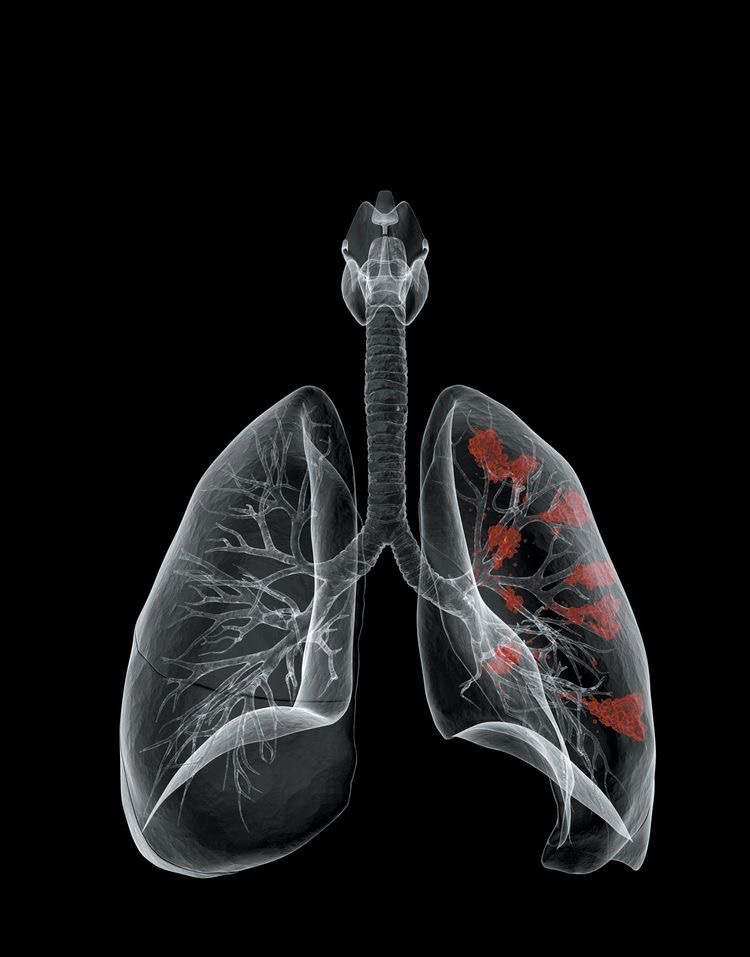

In [ ]:
#CALLIING THE DATASET OF THE LUNG CANCER!!
lungcancer_deaths_men=pd.read_csv('/content/lung_cancer_deaths_per_100000_men.csv')
lungcancer_deaths_women=pd.read_csv('/content/lung_cancer_deaths_per_100000_women.csv')
lungcancer_newcases_men=pd.read_csv('/content/lung_cancer_new_cases_per_100000_men.csv')
lungcancer_newcases_women=pd.read_csv('/content/lung_cancer_new_cases_per_100000_women.csv')


In [ ]:
lungcancer_deaths_men.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.1,21.0,21.0,20.8,20.8,20.8,20.7,20.7,20.7,20.6
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.2,25.5,25.8,25.8,25.4,25.4,25.2,25.2,25.3,25.4
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.9,40.9,41.3,41.9,43.2,44.4,44.5,44.7,44.8,44.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.2,58.9,58.3,57.9,57.5,56.1,55.9,55.6,55.3,55.0
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.1,27.4,26.8,26.3,25.7,25.3,24.9,24.5,24.1,23.7


In [ ]:
lungcancer_deaths_women.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.48,4.57,4.68,4.78,4.88,4.96,5.05,5.15,5.25,5.33
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.49,5.64,5.76,5.84,5.87,6.05,6.19,6.36,6.54,6.68
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.92,9.18,9.32,9.46,9.62,9.82,9.99,10.10,10.30,10.40
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.50,12.60,12.80,13.10,13.40,13.70,13.60,13.60,13.60,13.70
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.30,20.20,20.00,18.40,14.10,13.90,13.80,13.70,13.60,13.60


In [ ]:
lungcancer_newcases_men.head()

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.8,19.7,19.6,19.5,19.5,19.4,19.4,19.3,19.3,19.2
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.6,23.8,24.1,24.1,23.7,23.7,23.6,23.6,23.7,23.8
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.5,40.6,41.1,41.8,43.1,44.4,44.7,44.9,45.1,45.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.5,66.2,65.6,65.3,64.8,63.4,63.1,62.8,62.5,62.1
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.3,24.8,24.2,23.8,23.3,22.9,22.5,22.2,21.8,21.5


In [ ]:
lungcancer_newcases_women.head()

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.29,4.37,4.48,4.57,4.66,4.74,4.82,4.93,5.02,5.10
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.18,5.31,5.42,5.50,5.52,5.68,5.82,5.98,6.16,6.29
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.97,9.25,9.41,9.58,9.77,10.00,10.20,10.40,10.50,10.70
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.20,15.30,15.60,16.00,16.40,16.60,16.60,16.60,16.60,16.60
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.40,18.40,18.20,16.80,13.20,13.10,12.90,12.80,12.80,12.80


In [ ]:
features=['country']+['201'+ str(i) for i in range(2,10)]

In [ ]:
# extracting the required features and storing them
lungcancer_deaths_men = lungcancer_deaths_men[lungcancer_deaths_men['country']=='India'].loc[:,features]
lungcancer_deaths_women = lungcancer_deaths_women[lungcancer_deaths_women['country'] == 'India'].loc[:,features]
lungcancer_newcases_men = lungcancer_newcases_men[lungcancer_newcases_men['country'] == 'India'].loc[:,features]
lungcancer_newcases_women = lungcancer_newcases_women[lungcancer_newcases_women['country'] == 'India'].loc[:,features]

In [ ]:
# plotting an interactive graph using plotly for easier and efficient analysis

# assigning values to the X and Y axis of the graph
X1 = lungcancer_newcases_men.columns[1:]
y1 = lungcancer_newcases_men.values[0][1:]
X2 = lungcancer_deaths_men.columns[1:]
y2 = lungcancer_deaths_men.values[0][1:]

# plotting the graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=X1, y = y1, mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x=X2, y = y2, mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

In [ ]:
# plotting an interactive graph using plotly for easier and efficient analysis

# assigning values to the X and Y axis of the graph
X1 = lungcancer_newcases_women.columns[1:]
y1 = lungcancer_newcases_women.values[0][1:]
X2 = lungcancer_deaths_women.columns[1:]
y2 = lungcancer_deaths_women.values[0][1:]

# plotting the graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=X1, y = y1, mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x=X2, y = y2, mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in Women)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

In [ ]:
# Extracting features for prediction of new cases and deaths per 100,000 for breast cancer in women
lungcancer_newcases_men=pd.read_csv('/content/lung_cancer_new_cases_per_100000_men.csv')
lungcancer_deaths_men=pd.read_csv('/content/lung_cancer_deaths_per_100000_men (1).csv')
features=['country']+['199'+ str(i) for i in range(0,10)]
features = features+['200'+ str(i) for i in range(0,10)]
features = features+['201'+ str(i) for i in range(0,10)]
lungcancer_newcases_men = lungcancer_newcases_men[lungcancer_newcases_men['country']=='India'].loc[:,features]
lungcancer_deaths_men = lungcancer_deaths_men[lungcancer_deaths_men['country'] == 'India'].loc[:,features]
X1 = lungcancer_newcases_men.columns[1:].values.reshape(-1, 1)
y1 = lungcancer_newcases_men.values[0][1:].reshape(-1, 1)
X2 = lungcancer_deaths_men.columns[1:].values.reshape(-1, 1)
y2 = lungcancer_deaths_men.values[0][1:].reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 3)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)
model1 = LinearRegression()
model1.fit(X1_train_trans, y1_train)
model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)
y1_pred = model1.predict(X1_test_trans)
y2_pred = model2.predict(X2_test_trans)
print(r2_score(y1_pred, y1_test))
print(r2_score(y2_pred, y2_test))
y1_pred = model1.predict(poly.transform(X1))
y2_pred = model2.predict(poly.transform(X2))
keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict1 = sorted(keydict1.items())
dict2 = sorted(keydict2.items())
final1 = {}
final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
final2 = Convert(dict2, final2)
X1_final = []
Y1_final = []
X2_final = []
Y2_final = []
for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)
for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)
X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)
X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='Predicted New Cases'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='Pridicted Deaths'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

0.802494075533047
0.4815255922630015


In [ ]:
# Extracting features for prediction of new cases and deaths per 100,000 for breast cancer in women
lungcancer_newcases_women=pd.read_csv('/content/lung_cancer_new_cases_per_100000_women.csv')
lungcancer_deaths_women=pd.read_csv('/content/lung_cancer_deaths_per_100000_women.csv')
features=['country']+['199'+ str(i) for i in range(0,10)]
features = features+['200'+ str(i) for i in range(0,10)]
features = features+['201'+ str(i) for i in range(0,10)]
lungcancer_newcases_women = lungcancer_newcases_women[lungcancer_newcases_women['country']=='India'].loc[:,features]
lungcancer_deaths_women = lungcancer_deaths_women[lungcancer_deaths_women['country'] == 'India'].loc[:,features]
X1 = lungcancer_newcases_women.columns[1:].values.reshape(-1, 1)
y1 = lungcancer_newcases_women.values[0][1:].reshape(-1, 1)
X2 = lungcancer_deaths_women.columns[1:].values.reshape(-1, 1)
y2 = lungcancer_deaths_women.values[0][1:].reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 3)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)
model1 = LinearRegression()
model1.fit(X1_train_trans, y1_train)
model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)
y1_pred = model1.predict(X1_test_trans)
y2_pred = model2.predict(X2_test_trans)
print(r2_score(y1_pred, y1_test))
print(r2_score(y2_pred, y2_test))
y1_pred = model1.predict(poly.transform(X1))
y2_pred = model2.predict(poly.transform(X2))
keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict1 = sorted(keydict1.items())
dict2 = sorted(keydict2.items())
final1 = {}
final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
final2 = Convert(dict2, final2)
X1_final = []
Y1_final = []
X2_final = []
Y2_final = []
for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)
for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)
X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)
X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='Predicted New Cases'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='Pridicted Deaths'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

0.9631794660629422
0.9648152739365616


#Survival rate for Lung cancer!!!

In [ ]:
#CALLING THE DATASET FOR SURVIVAL OF LUNGS CANCER
lung_sur= pd.read_csv("/content/five-year-survival-rates-from-lung-cancer.csv")
lung_sur


,Entity,Code,Year,Lung,latitude,longitude
0,Algeria,DZA,1999,6.0,NaN,NaN
1,Algeria,DZA,2004,8.2,NaN,NaN
2,Algeria,DZA,2009,14.8,NaN,NaN
3,Argentina,ARG,2004,20.8,NaN,NaN
4,Argentina,ARG,2009,11.9,NaN,NaN
...,...,...,...,...,...,...
148,United States,USA,1999,15.2,39.764339,-104.855111
149,United States,USA,2004,16.6,39.764339,-104.855111
150,United States,USA,2009,18.7,39.764339,-104.855111
151,Uruguay,URY,2004,12.5,NaN,NaN


In [ ]:
lung_sur=lung_sur[(lung_sur["Entity"]=="Canada")|(lung_sur["Entity"]=="India")|(lung_sur["Entity"]=="United States")|(lung_sur["Entity"]=="Australia")|(lung_sur["Entity"]=="China")|(lung_sur["Entity"]=="United Kingdom")|(lung_sur["Entity"]=="Brazil")|(lung_sur["Entity"]=="France")|(lung_sur["Entity"]=="New Zealand")|(lung_sur["Entity"]=="Russia")|(lung_sur["Entity"]=="Turkey")]
lung_sur

,Entity,Code,Year,Lung,latitude,longitude
5,Australia,AUS,1999,13.7,-26.177229,133.417012
6,Australia,AUS,2004,14.8,-26.177229,133.417012
7,Australia,AUS,2009,15.0,-26.177229,133.417012
13,Brazil,BRA,1999,18.6,-22.163354,-67.928008
14,Brazil,BRA,2004,13.7,-22.163354,-67.928008
15,Brazil,BRA,2009,18.0,-22.163354,-67.928008
19,Canada,CAN,1999,15.1,56.970514,-84.908392
20,Canada,CAN,2004,15.6,56.970514,-84.908392
21,Canada,CAN,2009,17.3,56.970514,-84.908392
24,China,CHN,1999,7.5,39.938884,116.397459


In [ ]:
#PLOTTING THE MAP FOR SURVIVAL OF LUNGS CANCER USING FOLIUM LIBRARY!!!
lung_map= folium.Map(location=[54.089525,-15.012030],zoom_start=2)
folium.TileLayer('openstreetmap').add_to(lung_map)                              #ADDING THE OPEN STREETMAP STYLE IN THE MAP
folium.TileLayer('stamenterrain', attr="stamenterrain").add_to(lung_map)        #ADDING THE STAMEN TERRRIAN STYLE IN THE MAP
folium.TileLayer('stamenwatercolor', attr="stamenwatercolor").add_to(lung_map)  #ADDING THE STAMEN WATERCOLOR STYLE IN THE MAP
#ADDING THE TITLE TO THE MAP
lung_map.get_root().html.add_child(folium.Element('''
<div Style = Position:fixed;left:70px;top:0px;z-index:1000>
	<h2> State Wise Data For Cancer		</h2> <br/>
</div> '''))

#USE TO INSERT BUTTON...
ShapesLayer = folium.FeatureGroup(name='Shapes').add_to(lung_map)

for i in range(0,len(lung_sur),2):
  folium.Marker(radius=1, weight=1, border_width=10,
      location=[lung_sur.iloc[i]['latitude'], lung_sur.iloc[i]['longitude']],
      tooltip=lung_sur.iloc[i]['Entity'] ,
      popup=folium.Popup(' Year  \n'+ '<b>1999</b> :' + '\n'+ str(lung_sur.iloc[i-2]['Lung']) + ' \n'+'<b>2004</b>: '+ str(lung_sur.iloc[i-1]['Lung']) + '\n '+'<b>2009</b>: '+ str(lung_sur.iloc[i]['Lung'])
      ,max_width=400 ),
       icon = folium.Icon(icon='plus-square',prefix='fa')
        ).add_to(ShapesLayer)
folium.LayerControl().add_to(lung_map)

lung_map

# Colon and Rectum Cancer
Colon and rectal cancer are types of cancer that originate in the colon or rectum, which are part of the digestive system. The colon and rectum are the last parts of the large intestine, and they are responsible for absorbing water and electrolytes from the digested food before it is eliminated from the body.



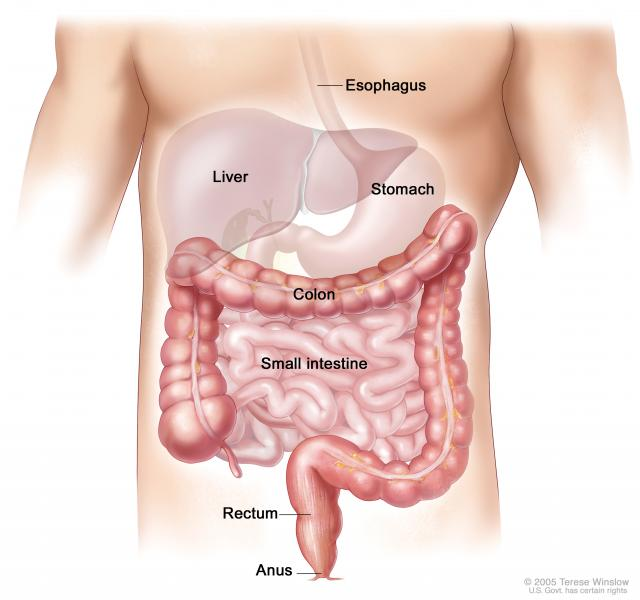

In [ ]:
#CALLING THE DATASET OF COLON & RECTUM CANCER
colonandrectum_deaths_men = pd.read_csv('/content/colonandrectum_cancer_deaths_per_100000_men.csv')
colonandrectum_deaths_women = pd.read_csv('/content/colonandrectum_cancer_deaths_per_100000_women.csv')
colonandrectum_newcases_men = pd.read_csv('/content/colonandrectum_cancer_new_cases_per_100000_men.csv')
colonandrectum_newcases_women = pd.read_csv('/content/colonandrectum_cancer_new_cases_per_100000_women.csv')

In [ ]:
colonandrectum_deaths_men.head()

,country,1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.33,7.43,7.52,7.59,7.69,7.76,7.83,7.89,7.96,7.99
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.30,10.60,10.90,11.00,11.00,11.20,11.30,11.40,11.60,11.70
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.68,8.95,9.11,9.31,9.69,10.00,10.20,10.20,10.30,10.40
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.90,37.50,37.20,36.80,36.40,35.90,35.80,35.70,35.60,35.50
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.60,20.20,19.80,19.60,19.30,19.00,18.90,18.60,18.50,18.40


In [ ]:
colonandrectum_deaths_women.head()

,country,1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.06,8.17,8.31,8.44,8.56,8.64,8.72,8.80,8.87,8.92
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.39,7.52,7.61,7.66,7.62,7.73,7.81,7.90,8.01,8.10
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.58,7.64,7.71,7.77,7.83,7.90,7.95,7.99,8.04,8.07
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.20,11.20,11.30,11.40,11.50,11.60,11.50,11.50,11.50,11.50
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.90,23.40,22.90,20.90,16.00,15.70,15.40,15.20,15.10,14.90


In [ ]:
colonandrectum_newcases_men.head()

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.53,7.66,7.77,7.87,7.99,8.08,8.16,8.26,8.36,8.41
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.30,10.60,11.00,11.10,11.10,11.30,11.40,11.70,11.90,12.10
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.30,13.80,14.10,14.60,15.30,16.10,16.40,16.70,17.00,17.20
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.20,88.50,88.00,87.20,86.40,85.60,85.60,85.40,85.40,85.20
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.90,23.60,23.30,23.20,23.00,22.80,22.80,22.60,22.70,22.90


In [ ]:
colonandrectum_newcases_women.head()

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.07,8.20,8.35,8.49,8.62,8.7,8.8,8.90,8.98,9.04
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.47,7.64,7.76,7.81,7.76,7.9,8.0,8.14,8.30,8.42
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.50,11.70,11.80,12.00,12.30,12.5,12.8,12.90,13.10,13.30
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.50,27.60,27.70,28.00,28.40,28.7,28.6,28.70,28.70,28.70
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.20,25.80,25.40,23.40,18.40,18.2,18.0,17.80,17.80,17.80


In [ ]:
features=['country']+['201'+ str(i) for i in range(2,10)]

In [ ]:
# extracting the required features and storing them
colonandrectum_deaths_men = colonandrectum_deaths_men[colonandrectum_deaths_men['country'] == 'India'].loc[:,features]
colonandrectum_deaths_women = colonandrectum_deaths_women[colonandrectum_deaths_women['country'] == 'India'].loc[:,features]
colonandrectum_newcases_men = colonandrectum_newcases_men[colonandrectum_newcases_men['country'] == 'India'].loc[:,features]
colonandrectum_newcases_women = colonandrectum_newcases_women[colonandrectum_newcases_women['country'] == 'India'].loc[:,features]


In [ ]:
# plotting an interactive graph using plotly for easier and efficient analysis

# assigning values to the X and Y axis of the graph
X1 = colonandrectum_newcases_men.columns[1:]
y1 = colonandrectum_newcases_men.values[0][1:]

X2 = colonandrectum_deaths_men.columns[1:]
y2 = colonandrectum_deaths_men.values[0][1:]

# plotting the graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=X1, y = y1, mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x=X2, y = y2, mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Colon and Rectum Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

In [ ]:
# plotting an interactive graph using plotly for easier and efficient analysis

# assigning values to the X and Y axis of the graph
X1 = colonandrectum_newcases_women.columns[1:]
y1 = colonandrectum_newcases_women.values[0][1:]
X2 = colonandrectum_deaths_women.columns[1:]
y2 = colonandrectum_deaths_women.values[0][1:]

# plotting the graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=X1, y = y1, mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x=X2, y = y2, mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Colon and Rectum Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

In [ ]:
# Extracting features for prediction of new cases and deaths per 100,000 for breast cancer in women
colonandrectum_newcases_men = pd.read_csv('/content/colonandrectum_cancer_new_cases_per_100000_men.csv')
colonandrectum_deaths_men = pd.read_csv('/content/colonandrectum_cancer_deaths_per_100000_men.csv')
features=['country']+['199'+ str(i) for i in range(0,10)]
features = features+['200'+ str(i) for i in range(0,10)]
features = features+['201'+ str(i) for i in range(0,10)]
colonandrectum_newcases_men = colonandrectum_newcases_men[colonandrectum_newcases_men['country']=='India'].loc[:,features]
colonandrectum_deaths_men = colonandrectum_deaths_men[colonandrectum_deaths_men['country'] == 'India'].loc[:,features]
X1 = colonandrectum_newcases_men.columns[1:].values.reshape(-1, 1)
y1 = colonandrectum_newcases_men.values[0][1:].reshape(-1, 1)
X2 = colonandrectum_deaths_men.columns[1:].values.reshape(-1, 1)
y2 = colonandrectum_deaths_men.values[0][1:].reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 3)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)
model1 = LinearRegression()
model1.fit(X1_train_trans, y1_train)
model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)
y1_pred = model1.predict(X1_test_trans)
y2_pred = model2.predict(X2_test_trans)
print(r2_score(y1_pred, y1_test))
print(r2_score(y2_pred, y2_test))
y1_pred = model1.predict(poly.transform(X1))
y2_pred = model2.predict(poly.transform(X2))
keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict1 = sorted(keydict1.items())
dict2 = sorted(keydict2.items())
final1 = {}
final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
final2 = Convert(dict2, final2)
X1_final = []
Y1_final = []
X2_final = []
Y2_final = []
for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)
for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)
X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)
X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='Predicted New Cases'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='Pridicted Deaths'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

0.9908869940865792
0.9763660145251976


In [ ]:
# Extracting features for prediction of new cases and deaths per 100,000 for breast cancer in women
colonandrectum_newcases_women = pd.read_csv('/content/colonandrectum_cancer_new_cases_per_100000_women.csv')
colonandrectum_deaths_women = pd.read_csv('/content/colonandrectum_cancer_deaths_per_100000_women.csv')
features=['country']+['199'+ str(i) for i in range(0,10)]
features = features+['200'+ str(i) for i in range(0,10)]
features = features+['201'+ str(i) for i in range(0,10)]
colonandrectum_newcases_women = colonandrectum_newcases_women[colonandrectum_newcases_women['country']=='India'].loc[:,features]
colonandrectum_deaths_women = colonandrectum_deaths_women[colonandrectum_deaths_women['country'] == 'India'].loc[:,features]
X1 = colonandrectum_newcases_women.columns[1:].values.reshape(-1, 1)
y1 = colonandrectum_newcases_women.values[0][1:].reshape(-1, 1)
X2 = colonandrectum_deaths_women.columns[1:].values.reshape(-1, 1)
y2 = colonandrectum_deaths_women.values[0][1:].reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 3)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)
model1 = LinearRegression()
model1.fit(X1_train_trans, y1_train)
model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)
y1_pred = model1.predict(X1_test_trans)
y2_pred = model2.predict(X2_test_trans)
print(r2_score(y1_pred, y1_test))
print(r2_score(y2_pred, y2_test))
y1_pred = model1.predict(poly.transform(X1))
y2_pred = model2.predict(poly.transform(X2))
keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict1 = sorted(keydict1.items())
dict2 = sorted(keydict2.items())
final1 = {}
final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
final2 = Convert(dict2, final2)
X1_final = []
Y1_final = []
X2_final = []
Y2_final = []
for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)
for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)
X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)
X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='Predicted New Cases'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='Pridicted Deaths'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

0.9592111973673625
0.9351394133387855


In [ ]:
#PLOTTING THE BAR GRAPH FOR THE COLON & RECTUM CANCER
fig = go.Figure(data=[
    go.Bar(name='newcases', x=X1, y=y1, text = y1),
    go.Bar(name='deaths', x=X2, y=y2, text = y2)
])
# Change the bar mode
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    barmode='group',
    title="Colon and Rectum Cancer(in men)",                 #ADDING THE TITLE TO GRAPH
    xaxis_title="Year",                                      #ADDING THE TITLE TO X-AXIS OF GRAPH
    yaxis_title="per 100,000",                               #ADDING THE TITLE TO Y-AXIS OF GRAPH
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

In [ ]:
X = colonandrectum_newcases_men.columns[1:]
y1 = colonandrectum_newcases_men.values[0][1:]
y2 = colonandrectum_deaths_men.values[0][1:]

#Survival rate of Different types of Cancer

In [ ]:
#CALLING THE DATASET OF SURVIVAL CANCER.!!
survivalrate=pd.read_csv('/content/five-year-survival-rates-by-cancer-type.csv')


In [ ]:
survivalrate.head()

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Algeria,DZA,1999,17.1,23.4,10.8,21.2,NaN,6.0,13.9,44.0,7.9,5.1
1,Algeria,DZA,2004,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6
2,Algeria,DZA,2009,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3
3,Argentina,ARG,2004,75.5,52.0,46.0,NaN,NaN,20.8,26.8,85.0,44.4,19.2
4,Argentina,ARG,2009,76.6,50.6,40.6,90.0,24.2,11.9,29.7,86.6,31.0,16.0


In [ ]:
survivalrate=survivalrate[survivalrate['Entity']=='India']


In [ ]:
survivalrate=survivalrate[survivalrate['Year']>1990]
survivalrate=survivalrate.fillna(0)

In [ ]:
#PLOTTING THE SUNBURST MAP FOR SURVIVAL OF CANCERS IN INDIA USING PLOTLY.EXPRESS
fig=px.sunburst(data_frame=survivalrate,path=['Entity','Year', 'Breast','Cervix','Colon', 'Leukaemia'
                , 'Liver', 'Lung', 'Ovary', 'Prostate', 'Rectum', 'Stomach' ]
                ,hover_data=['Code'],maxdepth=2,width=600,height=600,
                color_discrete_sequence=px.colors.qualitative.Prism)

fig.show()

# Cervical Cancer
Cervical cancer is a type of cancer that develops in the cells of the cervix, which is the lower part of the uterus. Most cervical cancers are caused by the human papillomavirus (HPV), a sexually transmitted infection.

Over time, HPV infection can cause changes to the cells in the cervix, which can lead to the development of cancer. However, not all women who have HPV infection will develop cervical cancer.

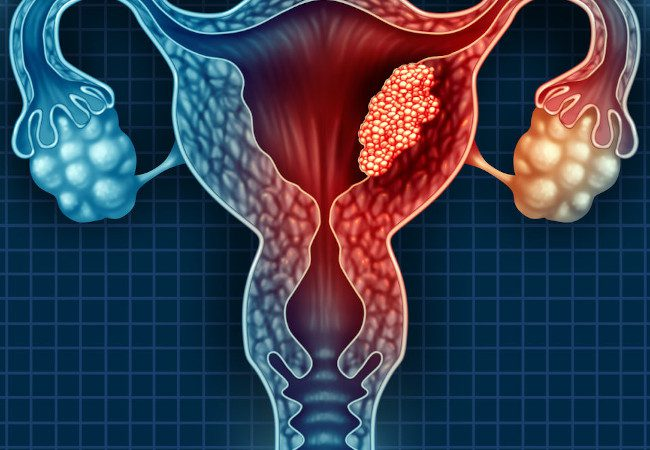

In [ ]:
#CALLING THE DATASET FOR CERVICAL CANCER ...
cervicalcancer_deaths__women = pd.read_csv('/content/cervical_cancer_deaths_per_100000_women.csv')
cervicalcancer_newcases__women = pd.read_csv('/content/cervical_cancer_new_cases_per_100000_women.csv')

In [ ]:
cervicalcancer_deaths__women.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.37,8.22,8.11,8.00,7.89,7.80,7.74,7.70,7.64,7.59
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.60,22.20,21.70,21.20,20.40,20.10,19.90,19.90,19.90,19.90
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.38,3.35,3.32,3.30,3.27,3.25,3.22,3.19,3.16,3.13
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.01,4.04,4.07,4.11,4.15,4.20,4.17,4.15,4.12,4.10
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.00,13.80,13.50,12.10,7.54,7.38,7.24,7.09,6.94,6.80


In [ ]:
cervicalcancer_newcases__women.head()

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.20,12.00,11.90,11.80,11.70,11.50,11.50,11.40,11.40,11.40
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.20,32.90,32.30,31.50,30.20,29.90,29.80,30.00,30.20,30.30
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.09,8.08,8.06,8.06,8.06,8.09,8.09,8.06,8.03,7.98
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.60,12.60,12.70,12.70,12.70,12.70,12.70,12.70,12.60,12.50
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.30,18.10,17.80,16.30,11.50,11.40,11.20,11.10,10.90,10.80


In [ ]:
features=['country']+['201'+ str(i) for i in range(2,10)]

In [ ]:
cervicalcancer_deaths__women = cervicalcancer_deaths__women[cervicalcancer_deaths__women['country']== 'India'].loc[:,features]
cervicalcancer_newcases__women = cervicalcancer_newcases__women[cervicalcancer_newcases__women['country']== 'India'].loc[:,features]

In [ ]:
# plotting an interactive graph using plotly for easier and efficient analysis

# assigning values to the X and Y axis of the graph
X1 = cervicalcancer_newcases__women.columns[1:]
y1 = cervicalcancer_newcases__women.values[0][1:]
X2 = cervicalcancer_deaths__women.columns[1:]
y2 = cervicalcancer_deaths__women.values[0][1:]

# plotting the graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=X1, y = y1, mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x=X2, y = y2, mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Cervical Cancer",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

In [ ]:
# Extracting features for prediction of new cases and deaths per 100,000 for breast cancer in women
cervicalcancer_newcases_women = pd.read_csv('/content/cervical_cancer_new_cases_per_100000_women.csv')
cervicalcancer_deaths_women = pd.read_csv('/content/cervical_cancer_deaths_per_100000_women.csv')
features=['country']+['199'+ str(i) for i in range(0,10)]
features = features+['200'+ str(i) for i in range(0,10)]
features = features+['201'+ str(i) for i in range(0,10)]
cervicalcancer_newcases_women = cervicalcancer_newcases_women[cervicalcancer_newcases_women['country']=='India'].loc[:,features]
cervicalcancer_deaths_women = cervicalcancer_deaths_women[cervicalcancer_deaths_women['country'] == 'India'].loc[:,features]
X1 = cervicalcancer_newcases_women.columns[1:].values.reshape(-1, 1)
y1 = cervicalcancer_newcases_women.values[0][1:].reshape(-1, 1)
X2 = cervicalcancer_deaths_women.columns[1:].values.reshape(-1, 1)
y2 = cervicalcancer_deaths_women.values[0][1:].reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 1, include_bias = True)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)
model1 = LinearRegression()
model1.fit(X1_train_trans, y1_train)
model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)
y1_pred = model1.predict(X1_test_trans)
y2_pred = model2.predict(X2_test_trans)
print(r2_score(y1_pred, y1_test))
print(r2_score(y2_pred, y2_test))
y1_pred = model1.predict(poly.transform(X1))
y2_pred = model2.predict(poly.transform(X2))
keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict1 = sorted(keydict1.items())
dict2 = sorted(keydict2.items())
final1 = {}
final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
final2 = Convert(dict2, final2)
X1_final = []
Y1_final = []
X2_final = []
Y2_final = []
for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)
for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)
X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)
X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='Predicted New Cases'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='Pridicted Deaths'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

0.541193027073996
0.8120723844532138


#Prostate Cancer
>located below the bladder in men. The prostate gland produces fluid that helps nourish and transport sperm.

>Prostate cancer usually develops slowly and may not cause any symptoms in its early stages. However, as the cancer grows, it can cause symptoms such as difficulty urinating, weak urine flow, blood in the urine or semen, and pain in the lower back, hips, or pelvis.

>Prostate cancer is one of the most common types of cancer in men, especially in older men. The exact cause of prostate cancer is not known, but factors that may increase a man's risk of developing prostate cancer include age, family history, and certain genetic mutations.



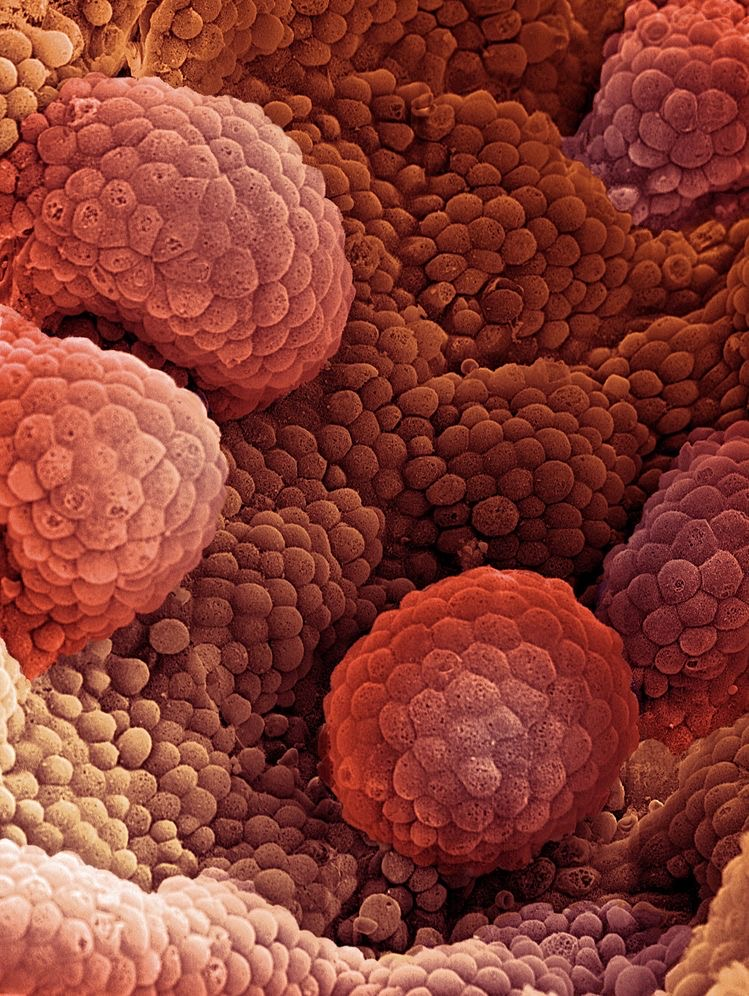

In [ ]:
#CALLING THE DATASET OF PROSTRATE CANCER....
prostatecancer_deaths = pd.read_csv('/content/prostate_cancer_deaths_per_100000_men (1).csv')
prostatecancer_newcases = pd.read_csv('/content/prostate_cancer_new_cases_per_100000_men.csv')

In [ ]:
prostatecancer_deaths.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,12.6,12.6,12.7,12.8,12.8,12.9,13.0,13.1,13.1
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.5,30.8,31.2,31.4,31.5,31.8,31.8,31.9,32.5,32.6
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.4,19.5,19.4,19.5,19.8,20.4,20.4,20.4,20.4,20.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.2,22.3,22.2,22.1,22.1,21.8,21.8,21.7,21.6,21.4
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.9,13.8,13.7,13.5,13.4,13.2,13.1,13.0,12.9,12.8


In [ ]:
prostatecancer_newcases.head()

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.2,12.4,12.5,12.6,12.8,12.9,13.0,13.2,13.4,13.5
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.5,29.1,29.6,29.9,29.9,30.4,30.6,31.0,31.8,32.1
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.2,32.6,32.9,33.3,34.5,36.4,37.0,37.5,37.9,38.3
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.8,76.2,76.0,76.2,76.2,75.7,75.8,75.7,75.4,75.1
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.8,23.1,23.2,23.3,23.3,23.3,23.4,23.5,23.9,24.2


In [ ]:
features = ['country'] + [ '201' + str(i) for i in range(2,10)]


In [ ]:
prostatecancer_deaths = prostatecancer_deaths[prostatecancer_deaths['country']=='India'].loc[:,features]
prostatecancer_newcases = prostatecancer_newcases[prostatecancer_newcases['country']=='India'].loc[:,features]

In [ ]:
# plotting an interactive graph using plotly for easier and efficient analysis

# assigning values to the X and Y axis of the graph
X1 = prostatecancer_newcases.columns[1:]
y1 = prostatecancer_newcases.values[0][1:]
X2 = prostatecancer_deaths.columns[1:]
y2 = prostatecancer_deaths.values[0][1:]

# plotting the graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=X1, y = y1, mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x=X2, y = y2, mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Prostate Cancer",                      #ADDING TITLE TO THE GRAPH
    xaxis_title="Year",                           #ADDING TITLE TO X-AXIS OF THE GRAPH
    yaxis_title="per 100,000",                    #ADDING TITLE TO Y-AXIS OF THE GRAPH
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

In [ ]:
# Extracting features for prediction of new cases and deaths per 100,000 for breast cancer in women
prostatecancer_newcases = pd.read_csv('/content/prostate_cancer_new_cases_per_100000_men.csv')
prostatecancer_deaths = pd.read_csv('/content/prostate_cancer_deaths_per_100000_men (1).csv')
features=['country']+['199'+ str(i) for i in range(0,10)]
features = features+['200'+ str(i) for i in range(0,10)]
features = features+['201'+ str(i) for i in range(0,10)]
prostatecancer_newcases = prostatecancer_newcases[prostatecancer_newcases['country']=='India'].loc[:,features]
prostatecancer_deaths = prostatecancer_deaths[prostatecancer_deaths['country'] == 'India'].loc[:,features]
X1 = prostatecancer_newcases.columns[1:].values.reshape(-1, 1)
y1 = prostatecancer_newcases.values[0][1:].reshape(-1, 1)
X2 = prostatecancer_deaths.columns[1:].values.reshape(-1, 1)
y2 = cervicalcancer_deaths_women.values[0][1:].reshape(-1, 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 3, include_bias = False)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)
model1 = LinearRegression()
model1.fit(X1_train_trans, y1_train)
y1_pred = model1.predict(X1_test_trans)
print(r2_score(y1_pred, y1_test))
y1_pred = model1.predict(poly.transform(X1))

poly = PolynomialFeatures(degree = 2, include_bias = False)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)
model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)
y2_pred = model2.predict(X2_test_trans)
print(r2_score(y2_pred, y2_test))
y2_pred = model2.predict(poly.transform(X2))

keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict1 = sorted(keydict1.items())
dict2 = sorted(keydict2.items())
final1 = {}
final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
final2 = Convert(dict2, final2)
X1_final = []
Y1_final = []
X2_final = []
Y2_final = []
for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)
for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)
X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)
X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='Predicted New Cases'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='New Cases'))
fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='Pridicted Deaths'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='Deaths'))
fig.update_layout(
    title="Lung Cancer(in men)",
    xaxis_title="Year",
    yaxis_title="per 100,000",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

0.8786452564091569
0.8566280241740023


# Stomach cancer
Stomach cancer, which is also called gastric cancer, is a growth of cells that starts in the stomach. The stomach is in the upper middle part of the belly, just below the ribs. The stomach helps to break down and digest food.Stomach cancer can happen in any part of the stomach.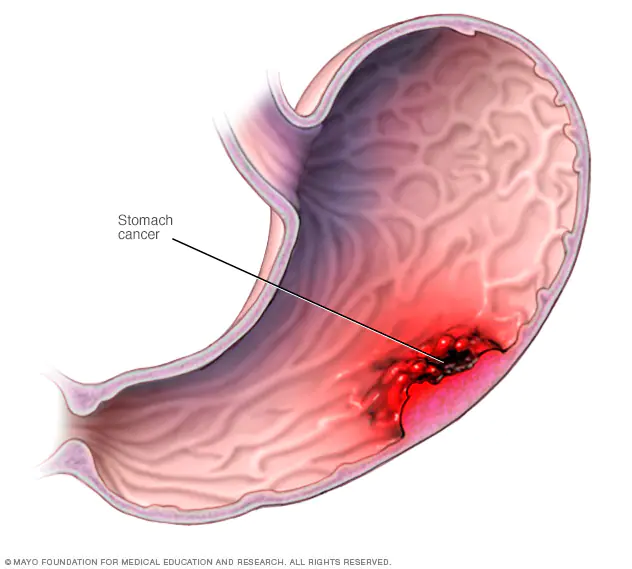

Stomach cancer treatment is most likely to be successful if the cancer is only in the stomach. The prognosis for people with small stomach cancers is quite good. Many can expect to be cured. Most stomach cancers are found when the disease is advanced and a cure is less likely. Stomach cancer that grows through the stomach wall or spreads to other parts of the body is harder to cure.
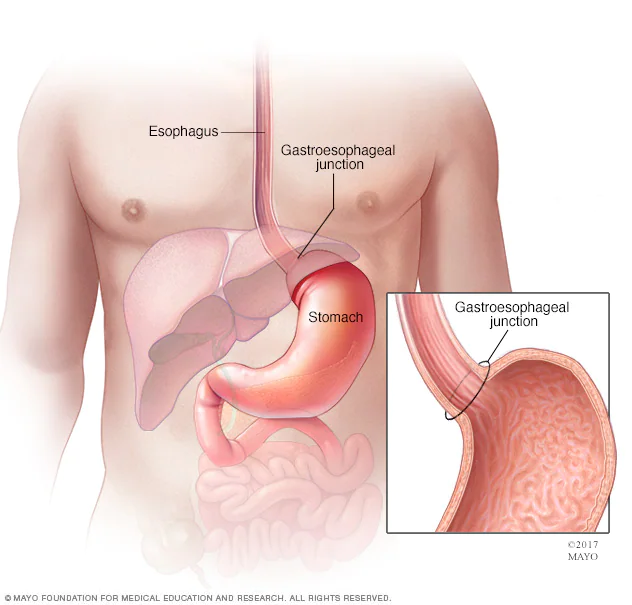

In [ ]:
#CALLING THE DATASET OF STOMACH CANCER......
df= pd.read_csv("/content/stomach_cancer_new_cases_per_100000_women.csv")
df


,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.80,26.40,26.20,25.90,25.60,25.40,25.20,25.20,25.00,24.70
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.57,6.47,6.33,6.17,5.91,5.82,5.74,5.71,5.68,5.66
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.66,6.73,6.72,6.71,6.69,6.69,6.68,6.66,6.64,6.60
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.46,9.50,9.52,9.63,9.73,9.83,9.78,9.72,9.67,9.61
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.30,12.00,11.70,10.30,6.27,6.13,6.02,5.89,5.78,5.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.98,10.00,9.99,9.91,9.84,9.78,9.72,9.67,9.62,9.56
203,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.90,13.80,13.70,13.60,13.50,13.50,13.50,13.60,13.80,13.80
204,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.71,4.58,4.41,4.33,4.37,4.38,4.26,4.12,3.80,3.65
205,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.81,6.75,6.61,6.47,6.34,6.22,6.10,6.06,5.97,5.90


In [ ]:
feature = ['country']+['201'+ str(i) for i in range(2,10)]
a=df[df['country']=="India"].loc[:,feature]
a

,country,2012,2013,2014,2015,2016,2017,2018,2019
83,India,6.95,7.08,7.11,7.23,7.15,7.07,7.07,7.02


In [ ]:
df1=pd.read_csv('/content/stomach_cancer_number_of_new_male_cases.csv')
df

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.80,26.40,26.20,25.90,25.60,25.40,25.20,25.20,25.00,24.70
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.57,6.47,6.33,6.17,5.91,5.82,5.74,5.71,5.68,5.66
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.66,6.73,6.72,6.71,6.69,6.69,6.68,6.66,6.64,6.60
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.46,9.50,9.52,9.63,9.73,9.83,9.78,9.72,9.67,9.61
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.30,12.00,11.70,10.30,6.27,6.13,6.02,5.89,5.78,5.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.98,10.00,9.99,9.91,9.84,9.78,9.72,9.67,9.62,9.56
203,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.90,13.80,13.70,13.60,13.50,13.50,13.50,13.60,13.80,13.80
204,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.71,4.58,4.41,4.33,4.37,4.38,4.26,4.12,3.80,3.65
205,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.81,6.75,6.61,6.47,6.34,6.22,6.10,6.06,5.97,5.90


In [ ]:
feature = ['country']+['201'+ str(i) for i in range(2,10)]
b=df[df['country']=="India"].loc[:,feature]
b

,country,2012,2013,2014,2015,2016,2017,2018,2019
83,India,6.95,7.08,7.11,7.23,7.15,7.07,7.07,7.02


In [ ]:
import pandas as pd
df2= pd.read_csv("/content/stomach_cancer_deaths_per_100000_men.csv")
df2


,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.5,36.8,36.2,35.60,35.10,34.7,34.40,34.20,33.90,33.50
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.4,14.3,14.3,14.00,13.50,13.3,13.00,12.90,12.80,12.70
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.6,15.8,15.7,15.70,16.10,16.4,16.30,16.10,15.90,15.80
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.8,10.8,10.7,10.60,10.40,10.2,10.10,10.00,9.92,9.81
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.3,13.0,12.7,12.40,12.10,11.8,11.60,11.30,11.00,10.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.5,16.3,16.3,16.10,16.00,15.9,15.80,15.70,15.60,15.40
204,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.2,26.0,25.8,25.60,25.30,25.3,25.40,25.60,26.00,26.30
205,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.8,10.5,10.1,9.81,9.69,9.7,9.36,9.18,8.55,8.19
206,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.4,14.0,13.4,12.90,12.50,12.2,11.90,11.80,11.70,11.50


In [ ]:
feature = ['country']+['201'+ str(i) for i in range(2,10)]
a1=df1[df1['country']=="India"].loc[:,feature]
a1

,country,2012,2013,2014,2015,2016,2017,2018,2019
82,India,36.8k,37.1k,36.7k,37.3k,38.1k,38.8k,39.9k,40.8k


# Liver cancer
Liver cancer is cancer that begins in the cells of your liver. Your liver is a football-sized organ that sits in the upper right portion of your abdomen, beneath your diaphragm and above your stomach.
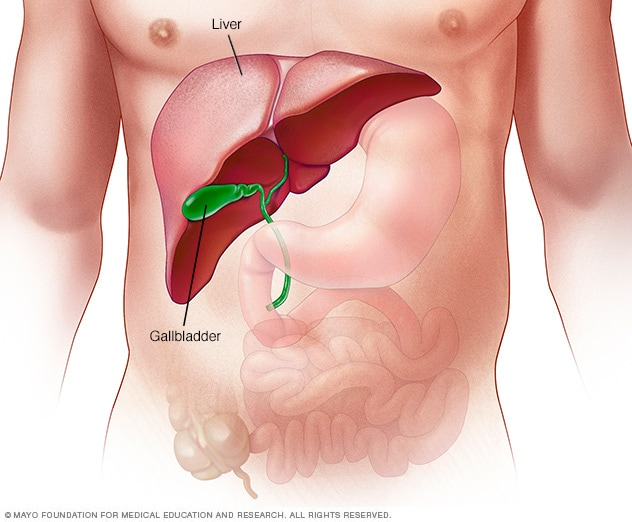
# Symptoms
Most people don't have signs and symptoms in the early stages of primary liver cancer. When signs and symptoms do appear, they may include:
*   Losing weight without trying
*   Yellow discoloration of your skin and the whites of your eyes    (jaundice)
White, chalky stools
*   Loss of appetite
*   Upper abdominal pain
*   Nausea and vomiting
*   General weakness and fatigue
*   Abdominal swelling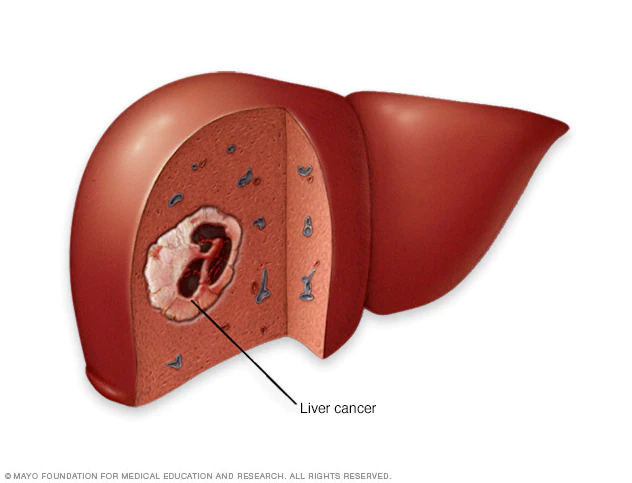






In [ ]:
#CALLING THE DATSET OF LIVER CANCER...
df3=pd.read_csv('/content/liver_cancer_deaths_per_100000_men.csv')
df3


,country,1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.00,11.00,10.90,10.80,10.80,10.80,10.80,10.70,10.70,10.60
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.51,3.52,3.55,3.57,3.56,3.57,3.56,3.57,3.61,3.63
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.60,9.70,9.74,9.82,10.10,10.40,10.50,10.60,10.70,10.70
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.20,12.20,12.30,12.40,12.50,12.40,12.40,12.40,12.40,12.30
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.97,5.98,5.98,6.03,6.07,6.09,6.08,6.06,6.04,6.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.65,7.58,7.54,7.53,7.53,7.54,7.55,7.53,7.49,7.44
204,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.06,4.08,4.08,4.11,4.12,4.17,4.21,4.25,4.27,4.30
205,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.80,10.50,10.30,10.20,10.20,10.10,9.74,9.67,9.35,9.16
206,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.18,4.19,4.17,4.18,4.18,4.19,4.21,4.17,4.13,4.07


In [ ]:
#THIS IS THE DATA OF DEATHS OCCURE DUE TO LIVER CANCER IN MEN
feature = ['country']+['201'+ str(i) for i in range(2,10)]
a3=df3[df3['country']=="India"].loc[:,feature]
a3

,country,2012,2013,2014,2015,2016,2017,2018,2019
84,India,3.75,3.76,3.66,3.69,3.66,3.62,3.62,3.6


In [ ]:
df5=pd.read_csv('/content/liver_cancer_new_cases_per_100000_men.csv')
df5

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.30,10.30,10.30,10.20,10.20,10.20,10.10,10.10,10.00,9.96
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.19,3.19,3.21,3.22,3.24,3.25,3.25,3.26,3.28,3.31
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.14,9.21,9.38,9.61,9.83,9.99,10.10,10.20,10.30,10.30
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.20,14.20,14.30,14.40,14.50,14.50,14.50,14.50,14.50,14.40
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.58,5.59,5.62,5.67,5.71,5.74,5.74,5.73,5.73,5.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.51,7.48,7.45,7.42,7.40,7.39,7.40,7.40,7.37,7.33
203,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.74,3.76,3.78,3.80,3.83,3.85,3.88,3.92,3.95,3.97
204,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.30,10.10,9.94,9.80,9.67,9.55,9.38,9.19,9.00,8.75
205,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.80,3.79,3.79,3.80,3.81,3.81,3.80,3.79,3.76,3.70


In [ ]:
#THIS IS THE DATA OF NEW CASES FOUND FOR LIVER CNACER IN MALES
feature = ['country']+['201'+ str(i) for i in range(2,10)]
a5=df5[df5['country']=="India"].loc[:,feature]
a5

,country,2012,2013,2014,2015,2016,2017,2018,2019
83,India,3.58,3.55,3.53,3.5,3.48,3.45,3.44,3.43


In [ ]:
import pandas as pd
df4=pd.read_csv('/content/liver_cancer_deaths_per_100000_women.csv')
df4


,country,1955,1956,1957,1958,1959,1960,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.90,10.70,10.60,10.50,10.40,10.40,10.20,10.20,10.10,10.00
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.92,1.89,1.88,1.86,1.82,1.82,1.79,1.79,1.80,1.81
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.07,3.12,3.15,3.19,3.21,3.25,3.28,3.30,3.32,3.33
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.77,5.85,5.96,6.14,6.33,6.53,6.49,6.49,6.49,6.49
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.93,3.90,3.86,3.57,2.21,2.20,2.20,2.19,2.17,2.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.71,2.72,2.71,2.71,2.71,2.71,2.71,2.72,2.72,2.72
204,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.53,2.54,2.53,2.53,2.54,2.54,2.54,2.55,2.55,2.57
205,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.50,4.36,4.25,4.20,4.21,4.13,3.98,3.83,3.62,3.50
206,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.16,2.17,2.16,2.15,2.14,2.11,2.10,2.11,2.10,2.10


In [ ]:
#THIS IS THE DATA OF DEATHS OCCURE DUE TO LIVER CANCER IN WOMEN
feature = ['country']+['201'+ str(i) for i in range(2,10)]
a4=df4[df4['country']=="India"].loc[:,feature]
a4

,country,2012,2013,2014,2015,2016,2017,2018,2019
84,India,1.93,1.96,1.94,1.98,1.96,1.95,1.96,1.96


In [ ]:
df6=pd.read_csv('/content/liver_cancer_new_cases_per_100000_women.csv')
df6

,country,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.70,10.60,10.40,10.30,10.20,10.10,10.00,9.91,9.84,9.77
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.80,1.78,1.76,1.73,1.71,1.69,1.68,1.67,1.67,1.69
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.89,2.91,2.94,2.99,3.04,3.07,3.11,3.13,3.15,3.17
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.61,6.74,6.93,7.14,7.31,7.38,7.37,7.34,7.34,7.35
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.81,3.64,3.26,2.82,2.45,2.29,2.29,2.29,2.30,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.64,2.64,2.64,2.63,2.63,2.63,2.63,2.64,2.64,2.65
203,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.40,2.41,2.41,2.42,2.42,2.42,2.43,2.43,2.44,2.46
204,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.19,4.12,4.05,3.98,3.91,3.84,3.71,3.55,3.40,3.24
205,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,2.00,1.99,1.97,1.96,1.96,1.95,1.95,1.94,1.94


In [ ]:
#THIS IS THE DATA OF NEW OCCURE DUE TO LIVER CAnCER IN WOMEN
feature = ['country']+['201'+ str(i) for i in range(2,10)]
a=df6[df6['country']=="India"].loc[:,feature]
a

,country,2012,2013,2014,2015,2016,2017,2018,2019
83,India,1.84,1.85,1.85,1.85,1.84,1.83,1.83,1.84


#survival rate foir liver cancer

In [ ]:
#SURVIVAL DATASET FOR LIVER CANCER
sur_liver=pd.read_csv("/content/five-year-survival-rate-from-liver-cancer2.csv")
sur_liver

,Entity,Code,Year,Liver,latitude,longitude
0,Algeria,DZA,2004,17.9,NaN,NaN
1,Algeria,DZA,2009,17.5,NaN,NaN
2,Argentina,ARG,2009,24.2,NaN,NaN
3,Australia,AUS,1999,13.2,-26.177229,133.417012
4,Australia,AUS,2004,14.3,-26.177229,133.417012
...,...,...,...,...,...,...
137,United Kingdom,GBR,2004,8.1,51.528642,-0.101599
138,United Kingdom,GBR,2009,9.3,51.528642,-0.101599
139,United States,USA,1999,8.5,39.764339,-104.855111
140,United States,USA,2004,11.9,39.764339,-104.855111


In [ ]:
sur_liver=sur_liver[(sur_liver["Entity"]=="Canada")|(sur_liver["Entity"]=="India")|(sur_liver["Entity"]=="United States")|(sur_liver["Entity"]=="Australia")|(sur_liver["Entity"]=="China")|(sur_liver["Entity"]=="United Kingdom")|(sur_liver["Entity"]=="Brazil")|(sur_liver["Entity"]=="France")|(sur_liver["Entity"]=="New Zealand")|(sur_liver["Entity"]=="Turkey")]
sur_liver

,Entity,Code,Year,Liver,latitude,longitude
3,Australia,AUS,1999,13.2,-26.177229,133.417012
4,Australia,AUS,2004,14.3,-26.177229,133.417012
5,Australia,AUS,2009,14.7,-26.177229,133.417012
11,Brazil,BRA,1999,15.9,-22.163354,-67.928008
12,Brazil,BRA,2004,17.9,-22.163354,-67.928008
13,Brazil,BRA,2009,11.6,-22.163354,-67.928008
17,Canada,CAN,1999,12.1,56.970514,-84.908392
18,Canada,CAN,2004,15.4,56.970514,-84.908392
19,Canada,CAN,2009,17.7,56.970514,-84.908392
22,China,CHN,1999,2.4,39.938884,116.397459


In [ ]:
#PLOTTING THE MAP FOR SURVIVAL OF LIVER CANCER USING FOLIUM LIBRARY....
liver_map= folium.Map(location=[54.089525,-15.012030],zoom_start=2)
folium.TileLayer('openstreetmap').add_to(liver_map)                             #ADDING THE OPEN STREET MAP LAYOUT IN MAP
folium.TileLayer('stamenterrain', attr="stamenterrain").add_to(liver_map)       #ADDING THE STAMEN TERRAIN MAP LAYOUT IN MAP
folium.TileLayer('stamenwatercolor', attr="stamenwatercolor").add_to(liver_map) #ADDING THE STAMEN WATERCOLOR MAP LAYOUT IN MAP

liver_map.get_root().html.add_child(folium.Element('''
<div Style = Position:fixed;left:70px;top:0px;z-index:1000>
	<h2> State Wise Data For Cancer		</h2> <br/>
</div> '''))

#USE TO INSERT BUTTON...
ShapesLayer = folium.FeatureGroup(name='Shapes').add_to(liver_map)

for i in range(0,len(sur_liver),2):
  folium.Marker(radius=1, weight=1, border_width=10,
      location=[sur_liver.iloc[i]['latitude'], sur_liver.iloc[i]['longitude']],
      tooltip=sur_liver.iloc[i]['Entity'] ,
      popup=folium.Popup(' Year  \n'+ '<b>1999</b> :' + '\n'+ str(sur_liver.iloc[i]['Liver']) + ' \n'+'<b>2004</b>: '+ str(sur_liver.iloc[i-1]['Liver']) + '\n '+'<b>2009</b>: '+ str(sur_liver.iloc[i-2]['Liver'])
      ,max_width=400 ),
       icon = folium.Icon(icon='plus-square',prefix='fa')
        ).add_to(ShapesLayer)
folium.LayerControl().add_to(liver_map)

liver_map